# Introdução à Linguagem de Programção Julia, Parte 2

Date: 2019-10-21  
Author: Pedro H. N. Vieira  
Categories: julia, tutoriais  
Tags: julia, tutorial  
<!--eofm-->

Este tutorial é a segunda parte no qual faço proselitismo de Julia ([confira a primeira parte](https://comp-eletromag.netlify.com/post/intro_julia_1/)). A ideia é oferecer um material em português sucinto para ser usado como referência àqueles que desejam aprender Julia ou como uma apresentação num *Workshop* ou minicurso. Já existe algum esforço em criar um tutorial mais completo em português, disponível no GitHub: https://github.com/JuliaLangPt/tutorial_PT_BR.

+ [Parte 1](https://comp-eletromag.netlify.com/post/intro_julia_1/)
  - Julia é melhor que MATLAB
  - Ecossistema
  - Onde e como obter informação e ajuda
  - Operações básicas
  - Controle de fluxo
  - Escopo de variáveis
  - Funções
  - Compreensão de listas
  - Álgebra Linear
  - Estruturas, dicionários e conjuntos
  - Gráficos
  - Manipular arquivos

+ **Parte 2**
  - Gráficos animados e iterativos
  - Estatística online
  - Desempenho e *benchmarking*
  - Estabilidade de tipos
  - Operações *in-place*: BLAS e LAPACK
  - Integração numérica
  - Diferenciação numérica
  - Equações diferenciais
  - Sistemas não-lineares
  - Otimização

Não faz parte deste tutorial falar de computação paralela, para o qual Julia também é poderoso. Este é um tópico extenso com muito potencial para *bugs* se a pessoa não souber o quê está fazendo. Para aqueles que desejam aprender, recomenda-se visitar o curso de [Computação Paralela no Julia Academy](https://juliaacademy.com/p/parallel-computing) (grátis, mas em inglês) ou ler a [documentação sobre computação paralela](https://docs.julialang.org/en/v1/manual/parallel-computing/).

## Gráficos animados e iterativos

### GIFs

Lembrando que o melhor lugar para aprender é por exemplo; [confira a documentação](https://docs.juliaplots.org/latest/).

Para gerar animações, `convert` ou `ffmpeg` deve estar disponível (instalado). Elas são criadas em 3 passos:
  + Inicializar um objeto `Animation`.
  + Salvar cada quadro da animação com `frame(anim)`.
  + Converter os quadros para um gif animado com `gif(anim, arquivo, fps=15)`.

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
p = plot([sin, cos], zeros(0), leg=false)
anim = Animation()
for x = range(0, stop=10π, length=100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
gif(anim, "anim1.gif", fps=15);

┌ Info: Saved animation to 
│   fn = /home/pedrohnv/codigos/comp-eletromag/notebooks/introducao_julia/anim1.gif
└ @ Plots /home/pedrohnv/.julia/packages/Plots/Iuc9S/src/animation.jl:95


![outgif](anim1.gif)

Também podemos usar a macro `@gif`. Vamos criar um gif do Atrator de Lorenz.

In [3]:
# definir o atrator de Lorenz
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

# calcular próximo ponto modificando a estrutura
function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end

# instanciar (criar) uma nova estrutura
attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)

# inicializar um gráfico 3D com uma série vazia
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

# construir um gif animado por inserção de novos ponto, salvando cada 10° quadro
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10;

┌ Info: Saved animation to 
│   fn = /home/pedrohnv/codigos/comp-eletromag/notebooks/introducao_julia/tmp.gif
└ @ Plots /home/pedrohnv/.julia/packages/Plots/Iuc9S/src/animation.jl:95


![lorenzgif](tmp.gif)

### Interação

Criar gráficos interativos precisa do [Interact](https://juliagizmos.github.io/Interact.jl/latest/) e [WebIO](https://github.com/JuliaGizmos/WebIO.jl). Utilizamos a macro
```julia
@manipulate expressão
```

onde `expressão` deve ser um laço `for`. As variáveis no laço são convertidas para *widgets* automaticamente (intervalos se tornam barras, listas de opções se tornam botões, etc...).

**Nota:** Há um bug no caso de usar [Jupyter Lab](https://github.com/JuliaGizmos/WebIO.jl/issues/348) no qual o valor dos *widgets* só atualiza propriamente após atualizar a página e reexecutar a célula.

In [4]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16710588726802871014\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18218711712689361653\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16710588726802871014\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [5]:
@manipulate for ϕ = 0:π/16:4π, f = [sin, cos], ambos = false
    if ambos
        p1 = plot(θ -> cos(θ + ϕ), 0, 8);
        p2 = plot(θ -> sin(θ + ϕ), 0, 8);
        plot(p1, p2, ylabel="f(theta + phi)", xlabel="theta + phi")
    else
        plot(θ -> f(θ + ϕ), 0, 8, ylabel="f(theta + phi)", xlabel="theta + phi")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ϕ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 65,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
33, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/pedrohnv/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/pedrohnv/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fec7b9cc9d0, Task (runnable) @0x00007fec7b9cc9d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.19635\",\"0.392699\",\"0.589049\",\"0.785398\",\"0.981748\",\"1.1781\",\"1.37445\",\"1.5708\",\"1.76715\",\"1.9635\",\"2.15984\",\"2.35619\",\"2.55254\",\"2.74889\",\"2.94524\",\"3.14159\",\"3.33794\",\"3.53429\",\"3.73064\",\"3

**Nota 2:** na página da web, os códigos acima exibirão mensagens de erro. A figura seguinte mostra a "cara" da saída do código acima.

![manipulate](manipulate.png)

## Estatística online

Quando se lida com dados em tempo real, ou com um conjunto muito grande de dados (ou ambos), é melhor utilizar algoritmos de "passada única" para fazer a análise destes dados, de preferência combinando com cuomputação paralela. O pacote [OnlineStats](https://joshday.github.io/OnlineStats.jl/latest/) pode ser utilizado para tal.

In [6]:
using OnlineStats

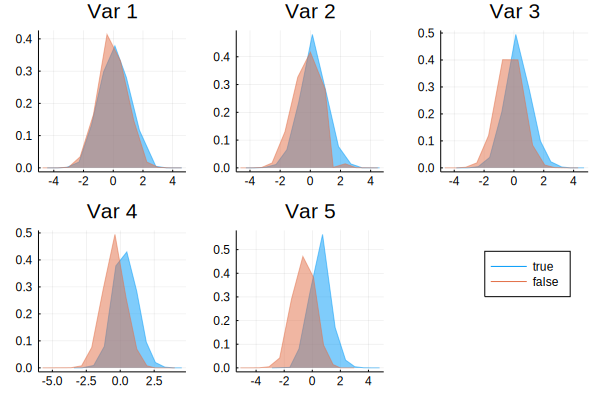

In [7]:
x = randn(10^6, 5)  # criar dados
y = x * [1,3,5,7,9] .> 0  # filtrar valores positivos
o = NBClassifier(5, Bool)  # 5 preditores com categorias Booleanas
fit!(o, zip(eachrow(x), y))  # fazer ajuste da estatística dos preditores
plot(o)

In [8]:
using Distributed  # usar computação distribuída
addprocs(3)  # adicionar 3 processos
@everywhere using OnlineStats  # fazer todos os processos usar OnlineStats
# distribuir a execução para os processos (assincronamente) e combinar os resultados
s = @distributed merge for i in 1:3
    y = cumsum(randn(10^6)) + 100*randn(10^6)  # gerar dados
    o1 = Partition(Mean())  # particionar baseado na média
    o2 = Partition(Extrema())  # particionar baseado nos extremos
    s = Series(o1, o2)  # série composta pelas partições
    fit!(s, y)  # ajustar estatística da série incluindo y nela
end;

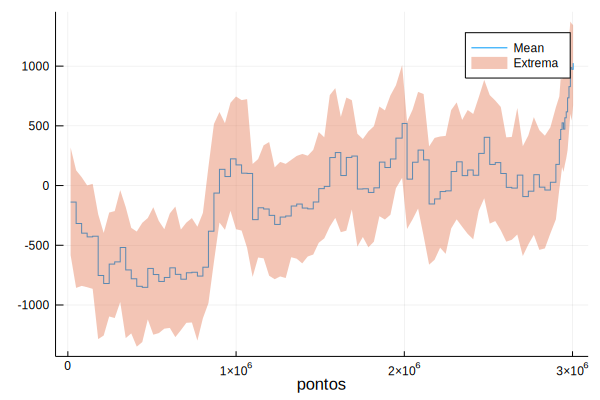

In [9]:
plot(s, layout=1, xlab="pontos")

## Desempenho e benchmarking

Para mensurar o desempenho de um código, utiliza-se o [BenchmarkTools](https://github.com/JuliaCI/BenchmarkTools.jl). Então utiliza-se as macros `@benchmark` ou `@btime` (versão resumida do primeiro). Elas fazem várias execuções do código e retornam o tempo mediano para executar, número de alocações de memória e total de bytes alocados (de cada execução). O resultado `GC` siginifica a porcentagem do tempo gasto com *Garbage Collection*, que é a liberação de memória alocada da qual não se precisa mais.

Ao fazer este tipo de análise, faça-o com código no escopo local (funções, por exemplo), pois o escopo global terá uma performance pior. Ademais, se for usar variáveis globais, declare-as como constante. Vide:

In [10]:
using BenchmarkTools

In [11]:
global a = 2
@btime x = 2a

  21.555 ns (0 allocations: 0 bytes)


4

In [12]:
foo() = 2a
@btime foo()

  21.558 ns (0 allocations: 0 bytes)


4

In [13]:
foo(x) = 2x
@btime foo(2)

  0.021 ns (0 allocations: 0 bytes)


4

In [14]:
const c1 = 2
@btime (x = 2c1)

  0.021 ns (0 allocations: 0 bytes)


4

Vamos criar uma função mais complicada e fazer o *benchmark* dela.

In [15]:
function foo(x, y)
    if x > y
        res = x^2 + 3x - y^4
    else
        res = x^2 + 3x - y^3
    end
    return res
end

foo (generic function with 3 methods)

Precisamos dizer à macro para fazer um setup antes de fazer suas avaliar: atribuir valores aleatórios a `x` e `y`. Caso contrário, a geração e atribuição deste número aleatório seria temporizado também.

In [16]:
@benchmark foo(x, y) setup=(x=rand(); y=rand())

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     58.326 ns (0.00% GC)
  median time:      62.722 ns (0.00% GC)
  mean time:        63.502 ns (0.00% GC)
  maximum time:     119.348 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     983

In [17]:
@btime foo(x, y) setup=(x=rand(); y=rand())

  61.415 ns (0 allocations: 0 bytes)


-0.04594987601393077

In [18]:
@benchmark foo(rand(), rand())  # sem setup

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     73.174 ns (0.00% GC)
  median time:      74.357 ns (0.00% GC)
  mean time:        74.779 ns (0.00% GC)
  maximum time:     246.165 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     974

Usar a função vetorizada:

In [19]:
n = 1000
@benchmark (res = foo.(x, y)) setup=(x=rand(n); y=rand(n))

BenchmarkTools.Trial: 
  memory estimate:  7.94 KiB
  allocs estimate:  1
  --------------
  minimum time:     69.650 μs (0.00% GC)
  median time:      70.184 μs (0.00% GC)
  mean time:        71.657 μs (1.49% GC)
  maximum time:     2.298 ms (95.95% GC)
  --------------
  samples:          10000
  evals/sample:     1

Usar a função dentro de um `for` (que cria escopo local):

In [20]:
n = 1000
res = Array{Float64}(undef, n)
@benchmark for i = 1:n
    res[i] = foo(x[i], y[i])
end setup=(x=rand(n); y=rand(n))

BenchmarkTools.Trial: 
  memory estimate:  93.44 KiB
  allocs estimate:  4979
  --------------
  minimum time:     223.205 μs (0.00% GC)
  median time:      234.673 μs (0.00% GC)
  mean time:        248.704 μs (6.02% GC)
  maximum time:     3.624 ms (92.97% GC)
  --------------
  samples:          10000
  evals/sample:     1

Mesma função, mas que recebe vetores e faz um laço `for` dentro dela.

In [21]:
function bar(x, y)
    n = minimum([length(x), length(y)])
    res = Array{Float64}(undef, n)
    for i  = 1:n
        if x[i] > y[i]
            res[i] = x[i]^2 + 3x[i] - y[i]^4
        else
            res[i] = x[i]^2 + 3x[i] - y[i]^3
        end
    end
    return res
end

bar (generic function with 1 method)

In [22]:
@benchmark (res = bar(x, y)) setup=(x=rand(n); y=rand(n))

BenchmarkTools.Trial: 
  memory estimate:  8.03 KiB
  allocs estimate:  2
  --------------
  minimum time:     35.826 μs (0.00% GC)
  median time:      39.899 μs (0.00% GC)
  mean time:        40.793 μs (1.62% GC)
  maximum time:     2.260 ms (97.57% GC)
  --------------
  samples:          10000
  evals/sample:     1

### Estabilidade de tipos

A instabilidade do tipo de uma variável ocorre quando ele pode mudar durante a execução, isto é, não pode ser inferido durante compilação. O efeito disto é que o compilador JIT não consegue otimizar código que lida com tais variáveis (cujo tipo é instável). Para saber se um código é tipo-estável, usamos a macro `@code_warntype`. A saída desta macro é o código "digerido" pelo compilador JIT; o importante é procurar por texto em vermelho ou amarelo, que sinalizam variáveis cujo tipo é instável.

In [23]:
?@code_warntype

```
@code_warntype
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_warntype`](@ref) on the resulting expression.


In [24]:
# exemplo tomado de https://discourse.julialang.org/t/suggestions-for-a-good-example-of-a-realistic-type-instability-for-julia-demo/23232/7?u=pedrohnv
function bad_positives(xs)
    ys = []
    for x in xs
        if x > 0
            push!(ys, x)
        end
    end
    return ys
end

function good_positives(xs)
    ys = similar(xs, 0)
    for x in xs
        if x > 0
            push!(ys, x)
        end
    end
    return ys
end

data = randn(1000);

**Nota:** na célula de saída do código seguinte, `@_4::Union{Nothing, Tuple{Float64,Nothing}}` está colorido. A versão página da web deste notebook, devido a uma limitação do Markdown, não renderiza cores no texto.

In [25]:
@code_warntype bad_positives(data[1])

Variables
  #self#::Core.Compiler.Const(bad_positives, false)
  xs::Float64
  ys::Array{Any,1}
  @_4::Union{Nothing, Tuple{Float64,Nothing}}
  x::Float64

Body::Array{Any,1}
1 ─       (ys = Base.vect())
│   %2  = xs::Float64
│         (@_4 = Base.iterate(%2))
│   %4  = (@_4::Tuple{Float64,Nothing} === nothing)::Core.Compiler.Const(false, false)
│   %5  = Base.not_int(%4)::Core.Compiler.Const(true, false)
└──       goto #6 if not %5
2 ─ %7  = @_4::Tuple{Float64,Nothing}::Tuple{Float64,Nothing}
│         (x = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Core.Compiler.Const(nothing, false)
│   %10 = (x > 0)::Bool
└──       goto #4 if not %10
3 ─       Main.push!(ys, x)
4 ┄       (@_4 = Base.iterate(%2, %9))
│   %14 = (@_4::Core.Compiler.Const(nothing, false) === nothing)::Core.Compiler.Const(true, false)
│   %15 = Base.not_int(%14)::Core.Compiler.Const(false, false)
└──       goto #6 if not %15
5 ─       Core.Compiler.Const(:(goto %7), false)
6 ┄       return ys


In [26]:
@code_warntype good_positives(data[1])

Variables
  #self#::Core.Compiler.Const(good_positives, false)
  xs::Float64
  ys::Union{}
  @_4::Union{}
  x::Union{}

Body::Union{}
1 ─     (ys = Main.similar(xs, 0))
│       Core.Compiler.Const(:(xs), false)
│       Core.Compiler.Const(:(@_4 = Base.iterate(%2)), false)
│       Core.Compiler.Const(:(@_4 === nothing), false)
│       Core.Compiler.Const(:(Base.not_int(%4)), false)
│       Core.Compiler.Const(:(%5), false)
│       Core.Compiler.Const(:(@_4), false)
│       Core.Compiler.Const(:(x = Core.getfield(%7, 1)), false)
│       Core.Compiler.Const(:(Core.getfield(%7, 2)), false)
│       Core.Compiler.Const(:(x > 0), false)
│       Core.Compiler.Const(:(%10), false)
│       Core.Compiler.Const(:(Main.push!(ys, x)), false)
│       Core.Compiler.Const(:(@_4 = Base.iterate(%2, %9)), false)
│       Core.Compiler.Const(:(@_4 === nothing), false)
│       Core.Compiler.Const(:(Base.not_int(%14)), false)
│       Core.Compiler.Const(:(%15), false)
│       Core.Compiler.Const(:(goto %7), f

In [27]:
@benchmark sum(bad_positives($data))

BenchmarkTools.Trial: 
  memory estimate:  24.13 KiB
  allocs estimate:  1020
  --------------
  minimum time:     17.636 μs (0.00% GC)
  median time:      18.332 μs (0.00% GC)
  mean time:        21.841 μs (13.86% GC)
  maximum time:     2.835 ms (98.28% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [28]:
@benchmark sum(good_positives($data))

BenchmarkTools.Trial: 
  memory estimate:  8.33 KiB
  allocs estimate:  9
  --------------
  minimum time:     4.595 μs (0.00% GC)
  median time:      4.849 μs (0.00% GC)
  mean time:        5.798 μs (15.19% GC)
  maximum time:     386.205 μs (97.05% GC)
  --------------
  samples:          10000
  evals/sample:     7

**Nota:** otimização precoce é a mãe de todos os bugs. Primeiro crie um código que funciona, depois use `BenchmarkTools` para encontrar as partes do código que são o gargalo e otimize eles (princípio de Pareto: 20% das causas são responsáveis por 80% dos problemas).

## Operações *in-place*: BLAS e LAPACK

O Gargalo da computação atualmente não é poder de processamento, e sim movimento de memória. Sempre que puder, evite novas alocações de memória utilizando, por exemplo, operações no lugar (*in-place*), isto é, usar código que modifica as variáveis ao invés de criar cópias modificadas. Exemplo: resolver o sistema linear $A\cdot x = b$, onde somente $x$ importa, $A$ e $b$ podem ser modificados sem prejuízo.

O MATLAB, por *design*, não aceita funções que modificam os argumentos (pois os argumentos sempre são [passados por valor](https://en.wikipedia.org/wiki/Evaluation_strategy#Call_by_value)). Tecnicamente, é [possível subverter isto](https://blogs.mathworks.com/loren/2007/03/22/in-place-operations-on-data/), porém inconsistente. Por isso, um código bem otimizado em Julia terá um desempenho superior que o equivalente em MATLAB.

In [29]:
using LinearAlgebra
n = 2500
a = rand(n,n)
b = rand(n);

Por inversão de matriz:

In [30]:
@benchmark inv($a)*$b

BenchmarkTools.Trial: 
  memory estimate:  48.94 MiB
  allocs estimate:  9
  --------------
  minimum time:     474.855 ms (0.84% GC)
  median time:      592.481 ms (0.67% GC)
  mean time:        584.324 ms (2.67% GC)
  maximum time:     717.727 ms (0.10% GC)
  --------------
  samples:          9
  evals/sample:     1

Resolver o sistema linear por Eliminação de Gauss:

In [31]:
@benchmark $a\$b

BenchmarkTools.Trial: 
  memory estimate:  47.72 MiB
  allocs estimate:  7
  --------------
  minimum time:     166.821 ms (0.41% GC)
  median time:      217.238 ms (1.78% GC)
  mean time:        221.354 ms (3.82% GC)
  maximum time:     337.054 ms (27.80% GC)
  --------------
  samples:          23
  evals/sample:     1

Eliminação de Gauss no lugar (note que primeiro precisamos fatorizar $A$ explicitamente, que também fazemos no lugar com `lu!`):

In [32]:
@benchmark ldiv!(lu!(ac), bc) setup=(ac=copy(a); bc=copy(b))

BenchmarkTools.Trial: 
  memory estimate:  19.67 KiB
  allocs estimate:  3
  --------------
  minimum time:     143.681 ms (0.00% GC)
  median time:      145.294 ms (0.00% GC)
  mean time:        159.698 ms (0.00% GC)
  maximum time:     233.984 ms (0.00% GC)
  --------------
  samples:          27
  evals/sample:     1

### Vistas de matrizes

Por padrão, utilizar `A[i1:k1, i2:k2]` numa expressão cria uma cópia desse corte. Uma macro que é muito útil é a `@view`, que cria uma referência para o corte, ao invés de uma cópia. Esta macro só pode ser usada para valores no lado direito da expressão, isto é, não pode ser usada para atribuição.

**Lembre-se:** `a = b` faz com que `a` seja outro nome para `b`; enquanto `a = b[:]` faz com que `a` seja uma cópia independente de `b`.

In [33]:
A = [1 2; 3 4]
b = @view A[:, 1]
fill!(b, 0)  # modificar b modificará o corte de A
A

2×2 Array{Int64,2}:
 0  2
 0  4

Tentar o seguinte causará erro:

```julia
A = [1 2; 3 4]
@view A[:, 1] = zeros(2)

ArgumentError: Invalid use of @view macro: argument must be a reference expression A[...].
```

Outra macro útil é a `@views expressão`, que faz com que toda operação de corte de matrizes dentro da expressão utilize vistas ao invés cópias.

In [34]:
function foo1()
    A = zeros(3, 3)
    @views for row in 1:3
        b = A[row, :]
        b[:] .= row
    end
end

function foo2()
    A = zeros(3, 3)
    for row in 1:3
        b = A[row, :]
        b[:] .= row
    end
end

foo2 (generic function with 1 method)

In [35]:
@benchmark foo1()

BenchmarkTools.Trial: 
  memory estimate:  160 bytes
  allocs estimate:  1
  --------------
  minimum time:     41.986 ns (0.00% GC)
  median time:      46.955 ns (0.00% GC)
  mean time:        62.158 ns (23.61% GC)
  maximum time:     2.320 μs (97.84% GC)
  --------------
  samples:          10000
  evals/sample:     991

In [36]:
@benchmark foo2()

BenchmarkTools.Trial: 
  memory estimate:  496 bytes
  allocs estimate:  4
  --------------
  minimum time:     137.196 ns (0.00% GC)
  median time:      146.019 ns (0.00% GC)
  mean time:        238.946 ns (35.30% GC)
  maximum time:     5.736 μs (97.17% GC)
  --------------
  samples:          10000
  evals/sample:     873

### BLAS e LAPACK

**Nota:** Essa subseção é mais de curiosidade.

- [BLAS](https://www.netlib.org/blas/) significa *Basic Linear Algebra Subprograms* e é um conjunto de rotinas em FORTRAN que providenciam os blocos fundamentais para operações com vetores e matrizes. 

- [LAPACK](http://performance.netlib.org/lapack/) significa *Linear Algebra PACKage* e providencia rotinas em FORTRAN para resolver sistemas de equações lineares, soluções de quadrado-mínimos de sistemas lineares, problemas de autovalores e valor singular.

Qualquer computação de alto desempenho depende deles e os usa atrás das cortinas (inclusive Julia, MATLAB, NumPy, etc). Os nomes das rotinas e seus argumentos são arcanos, e.g. `ZGEMM` para fazer multiplicação de matrizes complexas com precisão dupla. É necessário completar uma *side quest* e gastar dois pontos em liguística para entendê-los, porém vale o esforço quando se tem código cuja performance é realmente crítica (código que demora dias para executar).

É possível acessar essas rotinas do BLAS e LAPACK diretamente do Julia através de uma interface providenciada pelo `LinearAlgebra`. Exemplo:

```julia
using LinearAlgebra
BLAS.gemm(tA, tB, alpha, A, B)
LAPACK.gesv!(A, B)
```

Além disso, para casos críticos de desempenho, vale a pena aprender a compilar versões otimizadas (para uma máquina particular) do BLAS e LAPACK e vinculá-las ao Julia (ou qualquer outra biblioteca ou executável que depende deles). Isto, provavelmente, necessitará compilar tudo a partir do código fonte; o quê faz Linux mais atrativo para computação de alta performance.

Para quem quiser saber mais, dê uma olhada em: [OpenBLAS](https://www.openblas.net/), [IntelMKL](https://software.intel.com/en-us/articles/julia-with-intel-mkl-for-improved-performance), [ATLAS](http://math-atlas.sourceforge.net/). Qual destes é o melhor é impossível responder, pois depende da arquitetura da máquina sendo usada. Na minha experiência, o IntelMKL é a melhor opção para computadores que tem processadores Intel.

## Cálculo numérico

Às vezes é necessário recorrer ao cálculo numérico para realizar integração e diferenciação de funções, seja porque fórmula fechada para elas não existe, ou porque elas são argumento para uma rotina qualquer. Existem alguns pacotes para tal:

- [**Calculus**](https://github.com/JuliaMath/Calculus.jl): operações básicas de cálculo.
- [**QuadGK**](https://github.com/JuliaMath/QuadGK.jl): integração numérica unidimensional utilizando quadratura de Gauss-Kronrod adaptativa.
- [**ForwardDiff**](https://github.com/JuliaDiff/ForwardDiff.jl): métodos para calcular derivadas, gradientes, Jacobianos, Hessianos e derivadas de ordem elevada de funções Julia nativas (ou qualquer objeto chamável) utilizando *forward mode automatic differentiation* (diferenciação automática do modo de avanço).
- [**HCubature**](https://github.com/stevengj/HCubature.jl): integração numerica multidimensiona "h-adaptativa".

### Integração numérica

Utilizaremos o `HCubature` para realizar integração numérica. A utilização involve a função

```julia
integral, erro = hcubature(f, a, b; norm=norm, rtol=sqrt(eps), atol=0, maxevals=typemax(Int), initdiv=1)
```

Ela computa a integral $n$-dimensional de $f(x)$, onde `n == length(a) == length(b)`, sobre o hipercube cujos vértices são os vetores `a` e `b`. Isto é, a dimensão `x[i]` é integrada de `a[i]` até `b[i]`. Esta função retorna o valor computado da integral e a norma do erro estimado. Os argumentos opicionais dela são:

- `norm`: a função que computa a norma do erro
- `rtol`: o erro relativo requerido
- `atol`: o erro absoluto requerido
- `maxeval`: número máximo de avaliações de ${f(x)}$
- `initdiv`: número inicial de intervalos de cada dimensão

**Nota:** É importante que $f(x)$ seja capaz de realizar operações vetorizadas sobre seu argumento e que os limites sejam numeros de ponto flutuante!

Vamos supor que queremos integrar a função $f(\mathbf{x}) \,|\, \mathbb{R}^2 \to \mathbb{R}^3$

$$
f(\mathbf{x}, \alpha, \beta) =
\frac{\exp({-x_1^2 - x_2})}{\alpha} \,\hat a_1 +
\frac{\exp({-x_1 + \beta x_2})}{\alpha\beta} \,\hat a_2 +
\frac{\exp({-x_1^2 - x_2^\beta})}{\beta} \,\hat a_3
$$

Onde $\alpha$ e $\beta$ são parâmetros ajustáveis.

In [37]:
using HCubature

function foo(x, a, b)
    return [exp(-x[1]^2 - x[2])/a, exp(-x[1] - b*x[2])/(a*b), exp(-x[1]^2 - x[2]^b)/b]
end

foo (generic function with 4 methods)

In [38]:
n = 50
x1 = x2 = range(0, 1, length=n)
y = Array{Float64}(undef, 3, n)
for i = 1:n
    x = [x1[i], x2[i]]
    y[:, i] = foo(x, 1.1, 0.8)
end

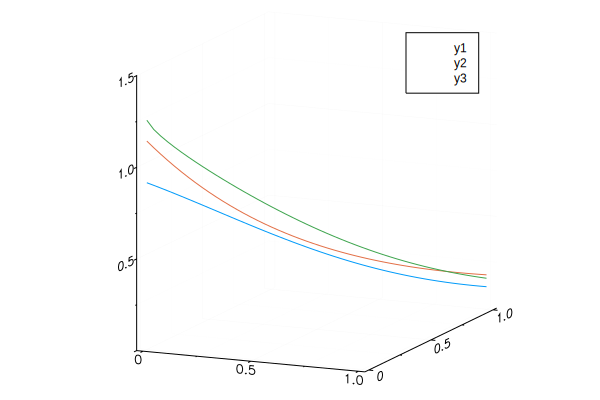

In [39]:
plot(x1, x2, y[1,:])
plot!(x1, x2, y[2,:])
plot!(x1, x2, y[3,:])

Precisamos, primeiro, colocar nossa função na forma esperada por `hcubature`, que é `f(x)`.

In [40]:
g(x) = foo(x, 1.1, 0.8)
a = [x1[1], x2[1]]  # limites inferiores
b = [x1[end], x2[end]]  # limites superiores
integral, erro = hcubature(g, a, b)  # vamos deixar todos os argumentos opcionais com valor padrão
@show integral
@show erro;

integral = [0.42916626198169877, 0.4944467087115467, 0.5565696972874351]
erro = 1.2527131988722264e-8


Outro exemplo: vamos integrar

$$ \int_{0.1}^1 \frac{e^x}{x}dx $$

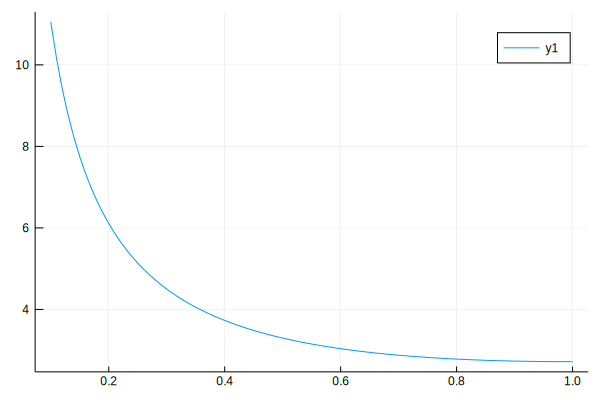

In [41]:
g(x) = @. exp(x)/x
plot(0.1:0.01:1, g)

In [42]:
a = [0.1]  # limite inferior, é esperado um vetor
b = [1.0]  # limite superior, deve ser vetor
integral, erro = hcubature(g, a, b)
@show integral
@show erro;

integral = [3.51793063032522]
erro = 4.326912383945114e-8


### Diferenciação numérica

Para diferenciação numérica, utilizaremos `ForwardDiff`, [vide documentação](http://www.juliadiff.org/ForwardDiff.jl/stable/). Diferenciação numérica é muito custoso de se fazer computacionalmente. Sempre que houver uma fórmula fechada para tal, é melhor usá-la. Este pacote é similar ao `HCubature`, no qual espera-se que a função `f(x)` passada para suas rotinas seja unária, isto é, tenha somente o argumento `x`.

Suponha que se tenha a função potencial elétrico dado por:

$$ u(x,y) = (3x + y^2)\,|\sin(x) + \cos(y)| $$

Vamos calcular o campo elétrico $\vec E = -\nabla u$ deste potencial usando diferenciação numérica.

In [43]:
using ForwardDiff
import PyPlot  # import ao invés de using, para não ter conflito de nomes

In [44]:
x = 1:0.2:20
y = 1:0.2:10
h(x, y) = (3x + y^2) * abs(sin(x) + cos(y))  # potencial
# não tem meshgrid, tem que fazer umas piruetas...
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(h, X, Y);
# criamos uma função para -gradiente no ponto
dh(x, y) = -ForwardDiff.gradient(a -> h(a[1], a[2]), [x, y])
v = map(dh, X, Y)
U = [vi[1] for vi in v]
V = [vi[2] for vi in v];

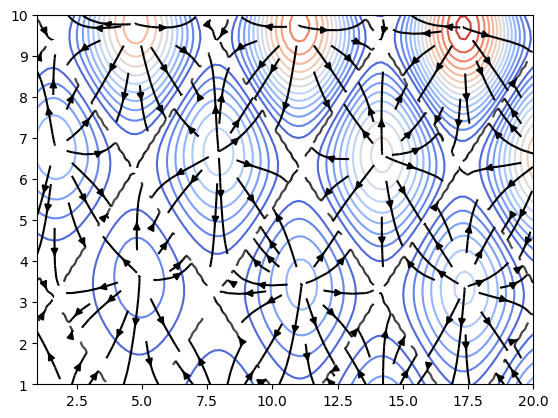

PyObject <matplotlib.streamplot.StreamplotSet object at 0x7fec72b22810>

In [45]:
PyPlot.contour(X, Y, Z, levels=15, cmap="coolwarm")
PyPlot.streamplot(X, Y, U, V, color=:black)

### Equações diferenciais

Resolver um sistema de equações diferenciais numericamente pode ser feito utilizando o pacote [DifferentialEquations](https://docs.juliadiffeq.org/latest/), também disponível para Python e R. Ele é capaz, inclusive, de [lidar com sistemas que possuem descontinuidades](https://docs.juliadiffeq.org/latest/features/callback_functions/) e [sistemas não-homogêneos](https://docs.juliadiffeq.org/latest/tutorials/ode_example/#Example-3:-Solving-Nonhomogeneous-Equations-using-Parameterized-Functions-1). O melhor lugar para se aprender é o [tutorial oficial](https://docs.juliadiffeq.org/latest/tutorials/ode_example/).

[DifferentialEquations](https://docs.juliadiffeq.org/latest/) pode ser usado para lidar com:

-    Equações discretas (mapas de funções, simulações estocásticas discretas (Gillespie/Markov))
-    Equações diferenciais ordinárias (ODEs)
-    ODEs divididas e particionadas (Integradores simpléticos, métodos IMEX)
-    ODEs estocásticas (SODEs ou SDEs)
-    Equações diferenciais aleatórias (RODEs or RDEs)
-    Equações diferenciais algébricas (DAEs)
-    Equações diferenciais de atraso (DDEs)
-    Equações discretas e contínuas mistas (Equações Híbridas, Difusões de Salto)
-    Equações diferenciais parciais (estocásticas) ((S)PDEs) (com ambos métodos de diferenças finitas e elementos finitos)

Vamos resolver um atrator de Lorenz parametrizado como exemplo.

$$
\begin{aligned}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{aligned}
$$

Definimos a função de forma que ela modifica os argumentos, para ter um desempenho melhor.

In [46]:
using DifferentialEquations

function parameterized_lorenz!(du, u, p, t)
    x,y,z = u
    σ,ρ,β = p
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
end

parameterized_lorenz! (generic function with 1 method)

Em seguida, definimos os valores iniciais `u0`, o intervalo `tspan` no qual desejamos solucionar o sistema, os parâmetros `p`, o problema `prob` e, por fim, achamos a solução `sol`.

In [47]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
p = [10.0, 28.0, 8/3]
prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
sol = solve(prob);

A solução `sol` é uma estrutura que pode ser alimentada diretamente para `Plots`.

número de pontos: 1278


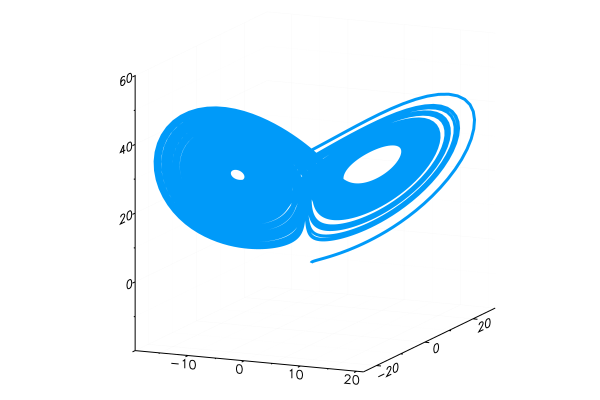

In [48]:
println("número de pontos: ", length(sol))
plot(sol, vars=(1,2,3), leg=false)

A estrutura de solução `sol` possui alguns campos que podem ser de nosso interesse.

In [49]:
fieldnames(typeof(sol))

(:u, :u_analytic, :errors, :t, :k, :prob, :alg, :interp, :alg_choice, :dense, :tslocation, :destats, :retcode)

In [50]:
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  7821
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          1277
Number of rejected steps:                          26
Maximum eigenvalue recorded:                       26

## Sistemas não-lineares

Pode-se utilizar o [NLsolve](https://github.com/JuliaNLSolvers/NLsolve.jl) para resolver um sistema de equações não lineares. Este pacote também serve para resolver problemas mistos de complementaridade. Como exemplo, vamos encontrar o ponto $(x,y)$ que zera o sistema seguinte:

$$
\begin{aligned}
f_1(x,y) &= (x+3)(y^3-7) + 18 =0 \\
f_2(x,y) &= \sin(ye^x-1) =0
\end{aligned}
$$

Usamos a função `nlsolve`, passando a ela a função que modifica no lugar o argumento `F`, um ponto inicial `x0`. Opcionalmente, pode-se providenciar a função que calcula o Jacobiano (recomendado, senão o Jacobiano é calculado automaticamente usando `ForwardDiff` atrás das cortinas).

In [51]:
using NLsolve

function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end

j! (generic function with 1 method)

In [52]:
@btime nlsolve(f!, [0.1; 1.2])

  7.945 μs (66 allocations: 4.86 KiB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-7.775548712324193e-17, 0.9999999999999999]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [53]:
@btime nlsolve(f!, j!, [0.1; 1.2])

  5.620 μs (60 allocations: 4.09 KiB)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-3.7818049096324184e-16, 1.0000000000000002]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

## Otimização

Sistemas de equações lineares podem surgir em problemas de otimização. O pacote [Optim](https://github.com/JuliaNLSolvers/Optim.jl) também pode ser usado para resolver este tipo de problemas. Usaremos a função a função de Rosenbrock para este exemplo:

$$ f(x,y) = (a-x)^2 + b(y-x^2)^2 $$

Usar `Optim` é similar ao `NLsolve`: providenciar uma função `f(x)`, pontos iniciais `x0` e, opcionalmente, uma função pra computar o Jacobiano e/ou Hessiano, um algoritmo a usar (Broyden-Fletcher-Goldfarb-Shanno no exemplo abaixo), etc.

In [54]:
using Optim
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
result = optimize(rosenbrock, zeros(2), BFGS())

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   5.471433e-17

 * Found with
    Algorithm:     BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 3.47e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.47e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.59e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.20e+03 ≰ 0.0e+00
    |g(x)|                 = 2.33e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    53
    ∇f(x) calls:   53


Informação adicional sobre o algoritmo usado:

In [55]:
?BFGS

search: BFGS LBFGS



# BFGS

## Constructor

```julia
BFGS(; alphaguess = LineSearches.InitialStatic(),
       linesearch = LineSearches.HagerZhang(),
       initial_invH = x -> Matrix{eltype(x)}(I, length(x), length(x)),
       manifold = Flat())
```

## Description

The `BFGS` method implements the Broyden-Fletcher-Goldfarb-Shanno algorithm as described in Nocedal and Wright (sec. 8.1, 1999) and the four individual papers Broyden (1970), Fletcher (1970), Goldfarb (1970), and Shanno (1970). It is a quasi-Newton method that updates an approximation to the Hessian using past approximations as well as the gradient. See also the limited memory variant `LBFGS` for an algorithm that is more suitable for high dimensional problems.

## References

  * Wright, S. J. and J. Nocedal (1999), Numerical optimization. Springer Science 35.67-68: 7.
  * Broyden, C. G. (1970), The convergence of a class of double-rank minimization algorithms, Journal of the Institute of Mathematics and Its Applications, 6: 76–90.
  * Fletcher, R. (1970), A New Approach to Variable Metric Algorithms, Computer Journal, 13 (3): 317–322,
  * Goldfarb, D. (1970), A Family of Variable Metric Updates Derived by Variational Means, Mathematics of Computation, 24 (109): 23–26,
  * Shanno, D. F. (1970), Conditioning of quasi-Newton methods for function minimization, Mathematics of Computation, 24 (111): 647–656.
